In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 12)

## EDA

In [7]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# checking null values
df.isnull().sum()

# we can see there are alot of null values in Cabin Age 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(891, 12)

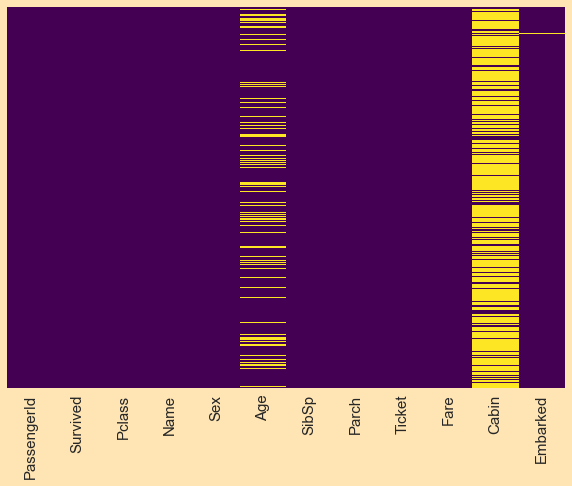

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.shape
# visualizing the null values

# We can see almost 20% data in age are having null values and more than 80% of data in Cabin is having null values

In [12]:
# with respect to cabin feature there are alot of null values, we can drop it 
df.drop(['Cabin'],axis=1,inplace=True)

In [13]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,C
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,S


In [14]:
# checking the data where missing values are present in Age feature
df[df['Age'].isnull()]  # here the data is missing completely at random

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

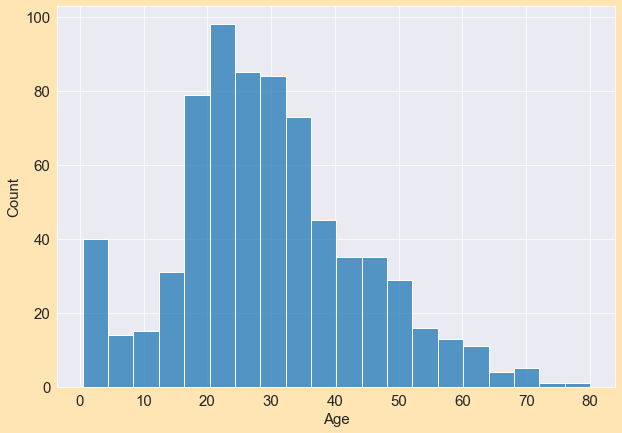

In [15]:
# checking the distribution of Age
sns.histplot(df['Age']) 


In [16]:
df['Age'].fillna(df['Age'].median(),inplace=True)

df['Age'].isnull().sum()

df['Age'].dropna().sample() # it gives one random sample or value

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)  # it gives random sample values for all the missing values based on the nonnull values in Age itself

# writing a function to try imputing using median and random imputation methods
def impute_nan(df,feature,median):
    df[feature+'median'] = df[feature].fillna(median)
    df[feature+'random'] = df[feature]
    
    random_sample = df[feature].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    # below here if want to merge the data the indexes have to be same so we are giving 
    random_sample.index = df[df[feature].isnull()].index
    
    df.loc[df[feature].isnull(),feature+'random'] = random_sample
    

median = df['Age'].median()
median

impute_nan(df,'Age',median)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Cjecking the distribution to make sure it is fitting properly
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde',ax=ax,color='red')
df['Agemedian'].plot(kind='kde',ax=ax,color='green')

# we can see after applying mean imputation and comapring the both graphs,the distribution is getting distorted it may cause problems


# Again checking the distribution if it fits for random imputation
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde',ax=ax,color='red')
df['Agerandom'].plot(kind='kde',ax=ax,color='green')

# We can see the two distributions are overlapping without any change in the distribution, we can say random imputation will be right choice


In [18]:
# df.isnull().sum()

In [19]:
# dropping the original Age and Age median feature because they are not necessary as we already filled the null values
#df.drop(['Agemedian','Age'],axis=1,inplace=True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
df[df['Embarked'].isnull()] # We can see embarked data is  missing completely at random

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [22]:
mode = df['Embarked'].mode()
mode

0    S
dtype: object

In [23]:
mode[0] # S is place which is the mode of Embarked 

'S'

In [24]:
# filling the na values in embarked with its mode
df['Embarked'].fillna(mode[0],inplace=True)

In [25]:
# CHECKING THE NULL VALUES NOW
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
duplicates = df[df.duplicated()]

In [28]:
duplicates # No duplicates

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [29]:
# Dropping features which are not useful for our model learning
df.drop(['PassengerId','Name','Ticket',],axis=1,inplace=True)

### EDA

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
df.describe().transpose()

# We can see Fare is highly skewed and contains may contain many outliers because the 75th percentile and max value has huge difference
# Agerandom is also skewed and may conatin outliers aswell.

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [32]:
df.Survived.value_counts() # The data is balanced 

0    549
1    342
Name: Survived, dtype: int64

In [33]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

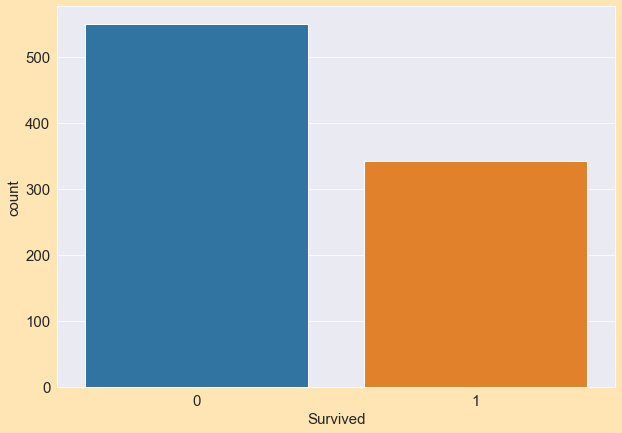

In [34]:
sns.countplot('Survived',data=df)
# 0- most of the people did not survive
# 1 - some of the people survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

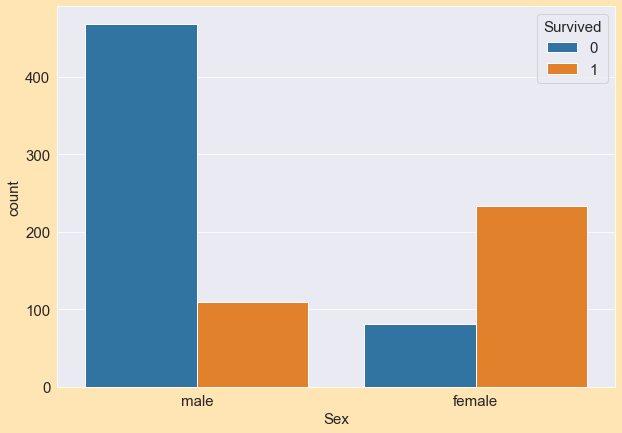

In [35]:
# checking the number of survived and  not survived men and women 
sns.countplot(x='Sex',hue='Survived',data=df)

# We can see most of the people who are not survived are men and very less women died
# And women had survived more than men and very few men lived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

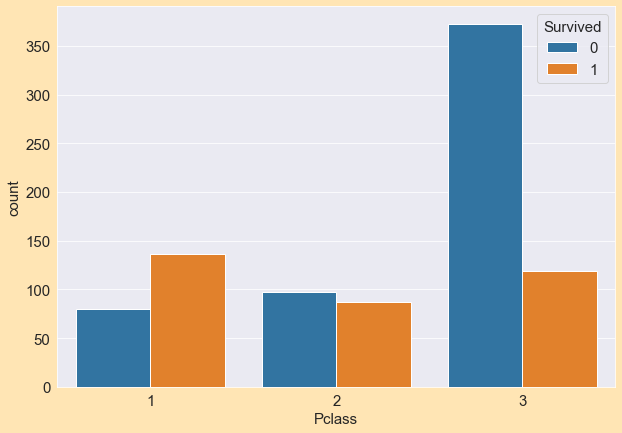

In [36]:
# looking at the passenger classes 
sns.countplot('Pclass',hue='Survived',data=df)

# class 1 represent upper class
# 2 is middle level class
# 3 is low level class

<AxesSubplot:xlabel='Survived', ylabel='count'>

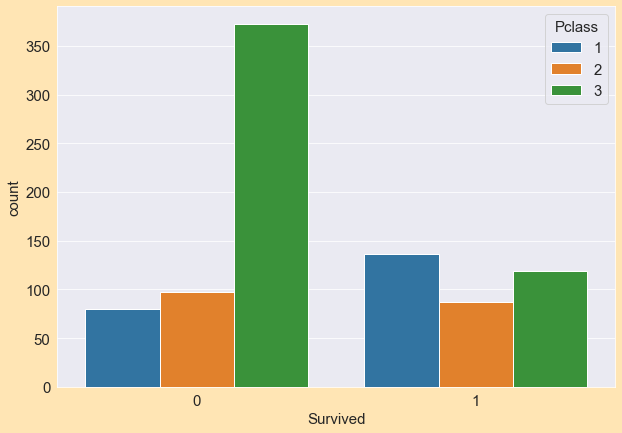

In [37]:
# Analysing the survival data  according to the passeger classes
sns.countplot(x='Survived',hue='Pclass',data=df)

# We can most of the class 3 passengers has not survived, which makes sense because because class 3 passengers are given less safety facilities
# and also a very few class 1 and 2 passengers have died.

# Clearly class 1 passengers have survived the most and very few class 3 passengers have lived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

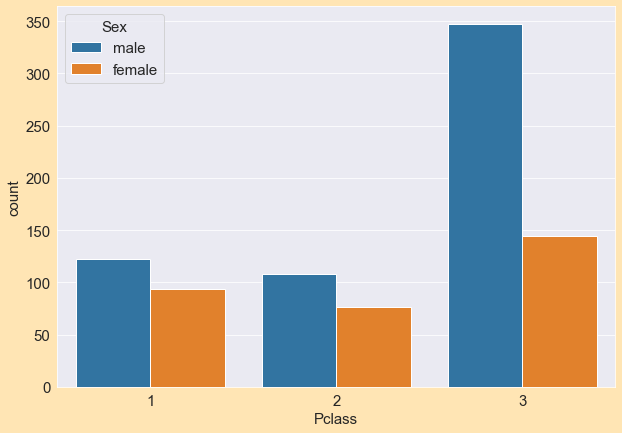

In [38]:
sns.countplot(x='Pclass',hue='Sex',data=df)
# if we want to see how many men and women belongs to each passesnger class
# most of the men belongs to class 3, which makes sense because they can be workers on the ship


<AxesSubplot:xlabel='SibSp', ylabel='count'>

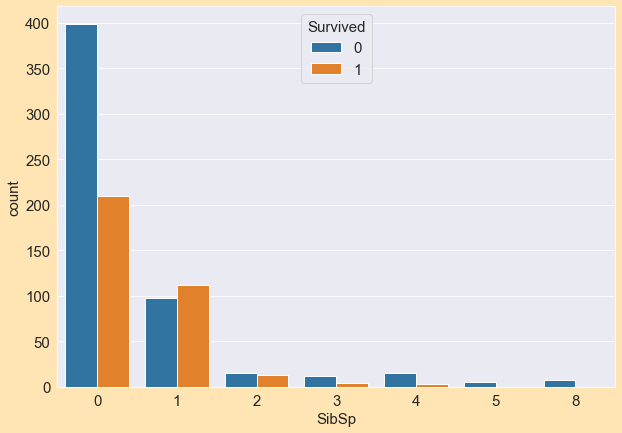

In [39]:
sns.countplot(x ='SibSp',hue='Survived',data=df)
# we can see most passengers who didnot come with no spouse or siblings didnot survive 

<AxesSubplot:xlabel='Parch', ylabel='count'>

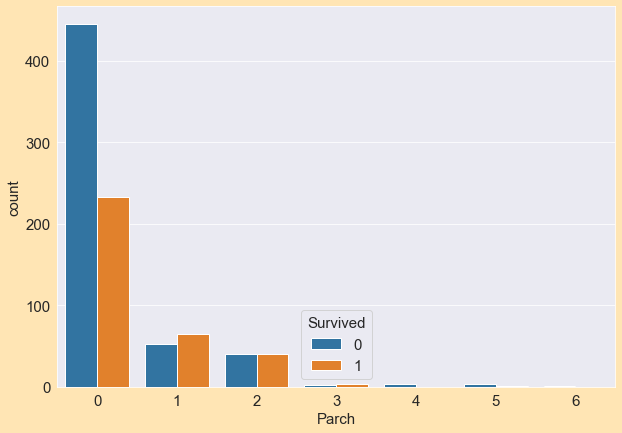

In [40]:
sns.countplot(x='Parch',hue='Survived',data=df)

# same goes with the Parch, most passengers who didn't come with a parent or child didn't survive

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

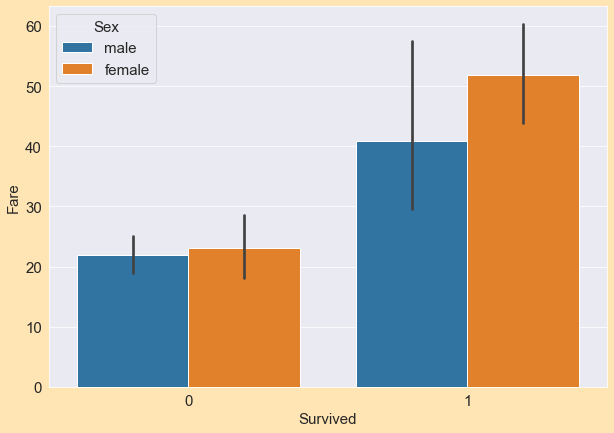

In [41]:
# Continuous and categorical
sns.barplot(x='Survived',y='Fare',hue='Sex',data=df)
# Passengers who paid more have survived, it makes sense
# And most high fare is paid by women

<AxesSubplot:xlabel='Survived', ylabel='Age'>

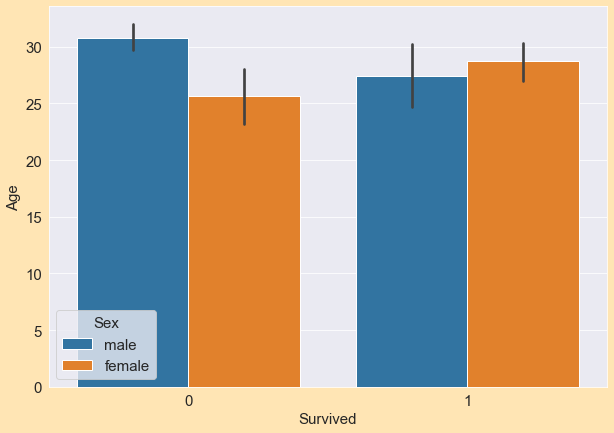

In [42]:
sns.barplot(x='Survived',y='Age',hue='Sex',data=df)

In [43]:
# checking survival rate of male and female 
df.groupby('Sex')['Survived'].mean()*100

# 74% of female survived this catastrophe 
# while men's survival rate is only 18%

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [44]:
# looking at the survival rate by sex and pclass
df.pivot_table('Survived',index='Sex',columns='Pclass')*100

# We can see in the lowest class 3 50% of survival rate while men have only 13%
# And if you are a female or woman travelling in pclass 1 there is 96% chance of survival

Pclass,1,2,3
Sex,,,
female,96.808511,92.105263,50.000000
male,36.885246,15.740741,13.544669


<AxesSubplot:xlabel='Sex'>

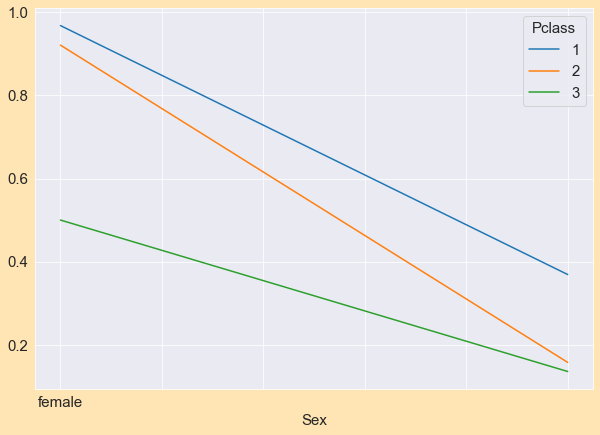

In [45]:
#plotting the above
df.pivot_table('Survived',index='Sex',columns='Pclass').plot()
# We can clearly observe the same thing in the graphs

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

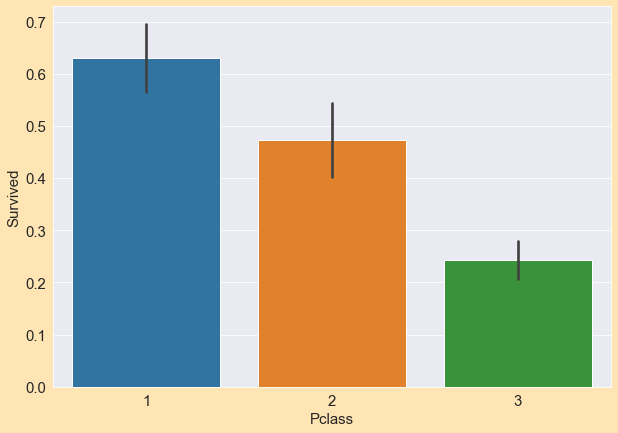

In [46]:
# Survival rate of each class
sns.barplot(x='Pclass',y='Survived',data=df)
# class 1 survival rate is more follwing class 2 and 3

In [47]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [48]:
df['Age'].max() # A 80 year old has travelled in the ship

80.0

In [49]:
# Survival rate by age,sex and class
age = pd.cut(df['Age'],[0.0,30.0,80.0])
df.pivot_table('Survived',['Sex',age],'Pclass')

# we can see the age between 30-80 has very high survival rate for women in class 1
# And there is not even 50% chance of survival for a male, even if he is in class 1 and is aged between 0 to 80

Pclass                      1         2         3
Sex    Age                                       
female (0.0, 30.0]   0.954545  0.934783  0.537190
       (30.0, 80.0]  0.980000  0.900000  0.304348
male   (0.0, 30.0]   0.382979  0.196721  0.142322
       (30.0, 80.0]  0.360000  0.106383  0.112500

<AxesSubplot:xlabel='Embarked', ylabel='count'>

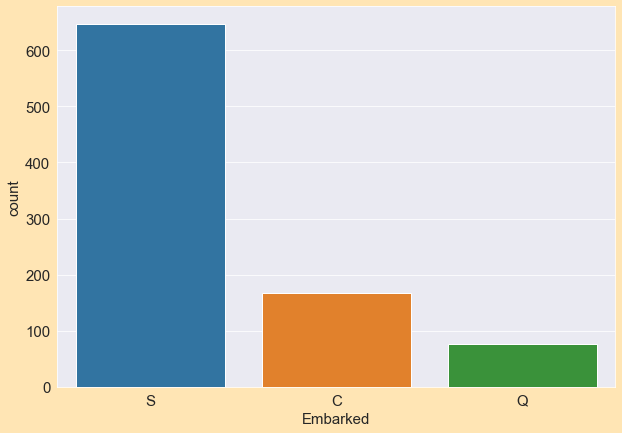

In [50]:
sns.countplot('Embarked',data=df)
# most of the passengers boarded from Southampton

In [51]:
df.groupby('Embarked')['Survived'].mean()*100
# People who have boarded from Cherbourg has high survival rate

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

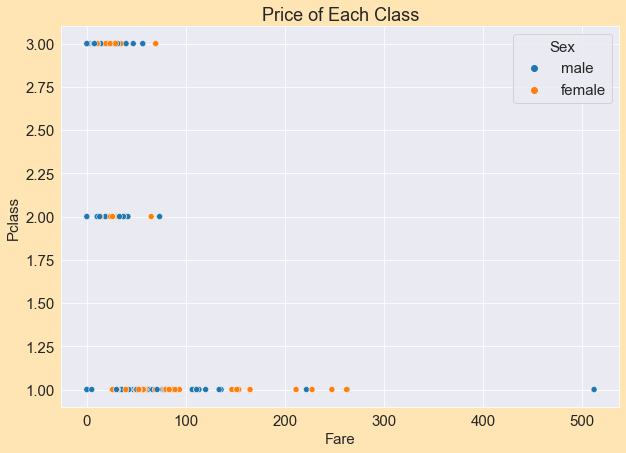

In [52]:
# prices paid by each class
sns.scatterplot(x='Fare',y='Pclass',hue='Sex',data=df)

plt.title('Price of Each Class')
plt.show()

# We can see for class 1 a man had to pay more than 500 dollars


In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [54]:
df.shape

(891, 8)

In [55]:
# correlation 
df.corr().transpose()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [56]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [57]:
# checking the unique values of categorical column
print(df.Sex.unique())
print(df.Embarked.unique())

['male' 'female']
['S' 'C' 'Q']


In [58]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [60]:
# Encoding the categorical features using onehot encoding and dropping the first column if binary
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='if_binary')

df_object = df.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(['Sex','Embarked'])

df = pd.concat([df.select_dtypes(exclude='object'),
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)


In [61]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [62]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male        int32
Embarked_C      int32
Embarked_Q      int32
Embarked_S      int32
dtype: object

In [63]:
# checking the correlation
df.corr().transpose()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.074053
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,0.030248,-0.031415,-0.006729
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184
Sex_male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,0.119224,-0.782742,-0.499421,1.000000


<AxesSubplot:>

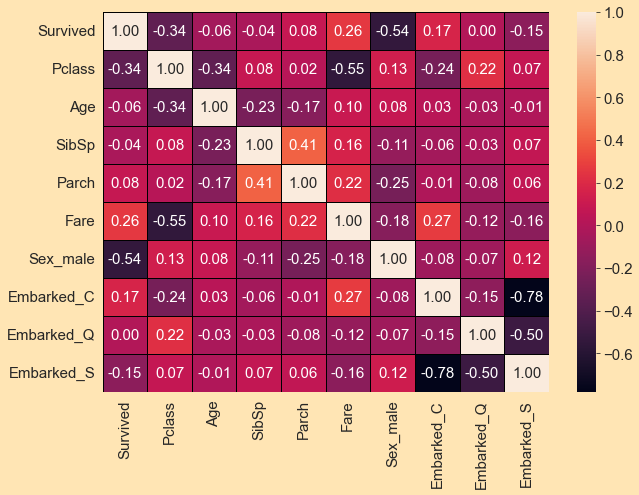

In [64]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [65]:
df.corr()['Survived'].sort_values()
# we can see embarked_s is least correlated with Embark so we should drop it.

Sex_male     -0.543351
Pclass       -0.338481
Embarked_S   -0.149683
Age          -0.064910
SibSp        -0.035322
Embarked_Q    0.003650
Parch         0.081629
Embarked_C    0.168240
Fare          0.257307
Survived      1.000000
Name: Survived, dtype: float64

In [66]:
df.drop(['Embarked_Q'],axis=1,inplace=True)

In [67]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Survived          AxesSubplot(0.125,0.71587;0.227941x0.16413)
Pclass         AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Age            AxesSubplot(0.672059,0.71587;0.227941x0.16413)
SibSp            AxesSubplot(0.125,0.518913;0.227941x0.16413)
Parch         AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Fare          AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Sex_male         AxesSubplot(0.125,0.321957;0.227941x0.16413)
Embarked_C    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Embarked_S    AxesSubplot(0.672059,0.321957;0.227941x0.16413)
dtype: object

<Figure size 1800x720 with 0 Axes>

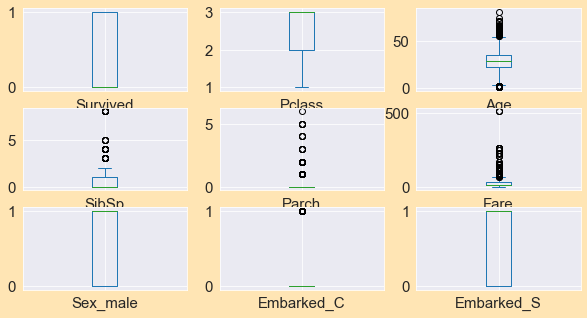

In [68]:
# checking the outliers
plt.figure(figsize=(25,10))
df.plot(kind ='box',subplots = True, layout =(4,3),sharex = False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

<Figure size 1800x720 with 0 Axes>

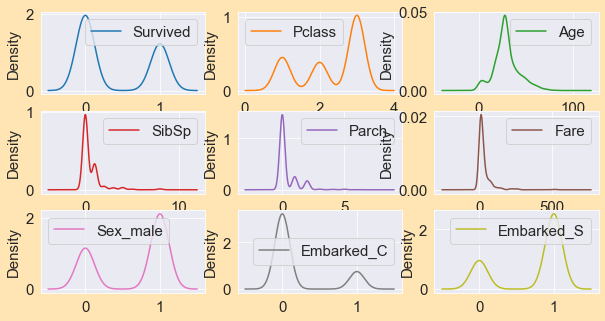

In [69]:
# checking the skewness
plt.figure(figsize=(25,10))
df.plot(kind ='density',subplots = True, layout =(4,3),sharex = False)

<AxesSubplot:xlabel='Fare'>

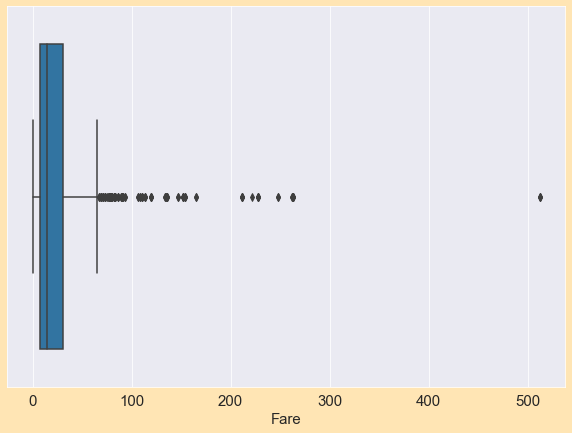

In [70]:
sns.boxplot('Fare',data=df)

<AxesSubplot:xlabel='Age'>

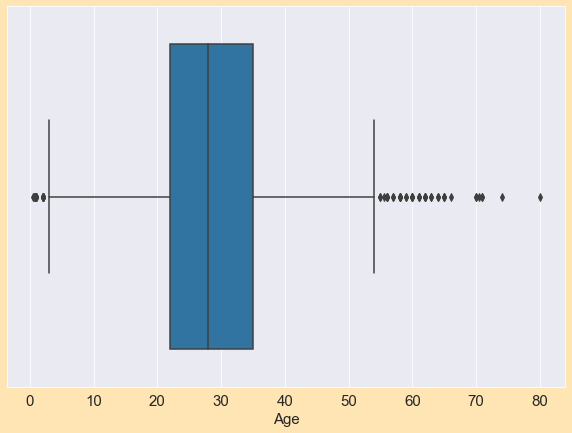

In [71]:
sns.boxplot('Age',data=df)

In [72]:
# removing outliers
from scipy.stats import zscore

dfContCols = df[["Fare","Age"]]

z=np.abs(zscore(dfContCols))

print(np.where(z>3))


(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
       527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
       851], dtype=int64), array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1], dtype=int64))


In [73]:
df_new=df[(z<3).all(axis=1)]

In [74]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

shape before and after
shape before         : (891, 9)
shape after          : (864, 9)
Percentage Loss      : 3.0303030303030303


In [75]:
# finding out the quantile of data with continuous columns
Q1 = dfContCols.quantile(0.25)
Q3 = dfContCols.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD (be carefull with the variables used here)
df_new_quant = df[~((dfContCols < (Q1 - 1.5 * IQR)) |(dfContCols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [76]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new_quant.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new_quant.shape[0])/df.shape[0]*100)

# We can see that the dataloss is more using quantile method 

shape before and after
shape before         : (891, 9)
shape after          : (721, 9)
Percentage Loss      : 19.07968574635241


In [77]:
# So, we are taking the zscore columns
df_new.shape

(864, 9)

<AxesSubplot:xlabel='Fare'>

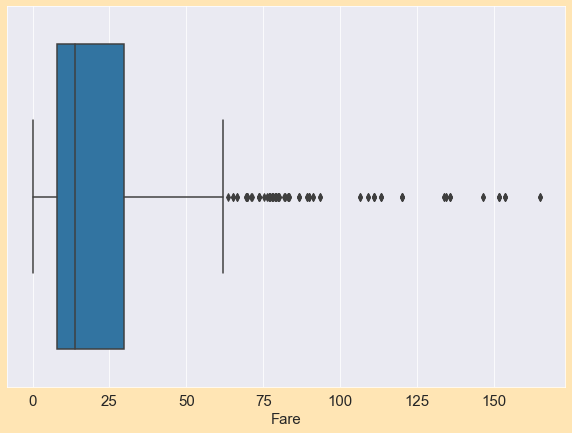

In [78]:
# Now checking the outliers again
sns.boxplot('Fare',data=df_new)
# we can see far outliers are removed

<AxesSubplot:xlabel='Age'>

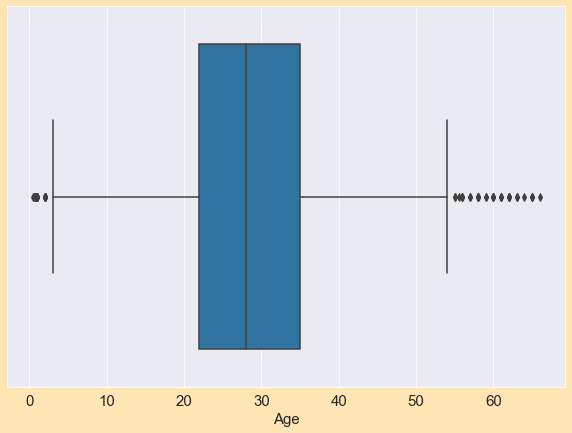

In [79]:
sns.boxplot('Age',data=df_new)
# few ouliers removed

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

<Figure size 1800x720 with 0 Axes>

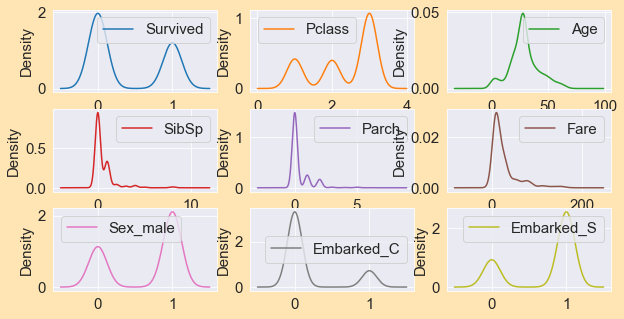

In [80]:
# checking the skewness again
plt.figure(figsize=(25,10))
df_new.plot(kind ='density',subplots = True, layout =(4,3),sharex = False)

In [81]:
df_new.skew().sort_values()

Embarked_S   -1.059810
Pclass       -0.708375
Sex_male     -0.632203
Age           0.321096
Survived      0.502011
Embarked_C    1.684381
Fare          2.257178
Parch         2.840412
SibSp         3.751753
dtype: float64

In [82]:
# splitting the data
x = df_new.iloc[:,1:]
y = df_new.iloc[:,1]

In [83]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [84]:
sc = StandardScaler()
x[['Age','Fare']] = sc.fit_transform(x[['Age','Fare']])

In [85]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S
0,3,-0.558682,1,0,-0.655160,1,0,1
1,1,0.722187,1,0,1.524090,0,1,0
2,3,-0.238464,0,0,-0.632188,0,0,1
3,1,0.482024,1,0,0.905257,0,0,1
4,3,0.482024,0,0,-0.627934,1,0,1
...,...,...,...,...,...,...,...,...
886,2,-0.158410,0,0,-0.459470,1,0,1
887,1,-0.798844,0,0,0.119092,0,0,1
888,3,-0.078356,1,2,-0.103824,0,0,1
889,1,-0.238464,0,0,0.119092,1,1,0


Logistic Regression

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [88]:
lr = LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is ', round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing accuracy score is ', round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 0 The model performs very well
At random state:- 0
Training accuracy score is  100.0
Testing accuracy score is  100.0 


At random state 1 The model performs very well
At random state:- 1
Training accuracy score is  100.0
Testing accuracy score is  100.0 


At random state 2 The model performs very well
At random state:- 2
Training accuracy score is  100.0
Testing accuracy score is  100.0 


At random state 3 The model performs very well
At random state:- 3
Training accuracy score is  100.0
Testing accuracy score is  100.0 


At random state 4 The model performs very well
At random state:- 4
Training accuracy score is  100.0
Testing accuracy score is  100.0 


At random state 5 The model performs very well
At random state:- 5
Training accuracy score is  100.0
Testing accuracy score is  100.0 


At random state 6 The model performs very well
At random state:- 6
Training accuracy score is  100.0
Testing accuracy score is  100.0 


At random state 7 The model performs very

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=50)

In [112]:
lr.fit(x_train,y_train)

LogisticRegression()

In [113]:
pred_train = lr.predict(x_train)

In [114]:
pred_test = lr.predict(x_test)

In [115]:
accuracy_score(y_train,pred_train)

1.0

In [116]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00       146

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



In [117]:
confusion_matrix(y_test,pred_test)

array([[ 62,   0,   0],
       [  0,  52,   0],
       [  0,   0, 146]], dtype=int64)

In [118]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)

In [119]:
for j in range(4,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    print(lsscore)
    lsc = lsscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',lsc*100)
    print('accuracy_score is:- ',lss*100)
    print('\n')
    
    # We can see our cross validation score is same as accuracy_score

[1. 1. 1. 1.]
At cv:-  4
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1.]
At cv:-  5
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1.]
At cv:-  6
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1.]
At cv:-  7
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  8
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  9
Cross validation score is:-  100.0
accuracy_score is:-  100.0




In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [135]:
dtc = DecisionTreeClassifier()
svc = SVC()
knc = KNeighborsClassifier()
gnb =  GaussianNB()
sgd = SGDClassifier()
rfc = RandomForestClassifier()

In [122]:
cvs = GridSearchCV(dtc,{'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"]})

In [123]:
cvs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [124]:
print(cvs.best_score_)
print(cvs.best_estimator_)
print(cvs.best_params_)

1.0
DecisionTreeClassifier()
{'criterion': 'gini', 'splitter': 'best'}


In [125]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc_test= dtc.predict(x_test)
pred_dtc_train = dtc.predict(x_train)
print('Training score of dtc',accuracy_score(pred_dtc_train,y_train))
print('Accuracy Score of dtc',accuracy_score(pred_dtc_test,y_test))
print('Confusion Matrix of dtc',confusion_matrix(pred_test,y_test))
print('Classification report of Dtc',classification_report(pred_test,y_test))
print('\n')

Training score of dtc 1.0
Accuracy Score of dtc 1.0
Confusion Matrix of dtc [[ 62   0   0]
 [  0  52   0]
 [  0   0 146]]
Classification report of Dtc               precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00       146

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260





In [126]:
dtca = accuracy_score(pred_dtc_test,y_test)
dtca

1.0

In [127]:
for j in range(4,10):
    dtcscore = cross_val_score(lr,x,y,cv=j)
    print(dtcscore)
    dsc = dtcscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',dsc*100)
    print('accuracy_score is:- ',dtca*100)
    print('\n')

[1. 1. 1. 1.]
At cv:-  4
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1.]
At cv:-  5
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1.]
At cv:-  6
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1.]
At cv:-  7
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  8
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  9
Cross validation score is:-  100.0
accuracy_score is:-  100.0




In [128]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 100.0
[[ 62   0   0]
 [  0  52   0]
 [  0   0 146]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00       146

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



In [129]:
# CV for RFC
from sklearn.model_selection import cross_val_score
rfa = accuracy_score(y_test,predrf)

In [130]:
for j in range(4,10):
    rfscore = cross_val_score(rf,x,y,cv=j)
    print(lsscore)
    rfc = rfscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',rfc*100)
    print('accuracy_score is:- ',rfa*100)
    print('\n')
# We can see the accuracy is almost same

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  4
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  5
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  6
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  7
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  8
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  9
Cross validation score is:-  100.0
accuracy_score is:-  100.0




In [131]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train = algorithm_instance.predict(x_train)
    model_1_pred_test = algorithm_instance.predict(x_test)
    print('Accuracy Score of the training model: ',accuracy_score(y_train,model_1_pred_train))
    print('Accuracy Score of the testing model: ',accuracy_score(y_test,model_1_pred_test))
    print('Classification report of the test data \n ',classification_report(y_test,model_1_pred_test))
    print('Classification report of the train data \n ',classification_report(y_train,model_1_pred_train))
    print('Confusion Matrix: \n',confusion_matrix(y_test,model_1_pred_test))

In [136]:
model_selection(svc,x_train,y_train,x_test,y_test)

Accuracy Score of the training model:  1.0
Accuracy Score of the testing model:  1.0
Classification report of the test data 
                precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00       146

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

Classification report of the train data 
                precision    recall  f1-score   support

           1       1.00      1.00      1.00       130
           2       1.00      1.00      1.00       131
           3       1.00      1.00      1.00       343

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604

Confusion Matrix: 
 [[ 62   0   0]
 [  0  52   0]
 [  0   0 146]]


In [137]:
pred_sv = svc.predict(x_test)
svca = accuracy_score(y_test,pred_sv)
for j in range(4,10):
    svccore = cross_val_score(svc,x,y,cv=j)
    print(svccore)
    svcc = svccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',svcc*100)
    print('accuracy_score is:- ',svca*100)
    print('\n') # cv and accuracy is almost same

[1. 1. 1. 1.]
At cv:-  4
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1.]
At cv:-  5
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1.]
At cv:-  6
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1.]
At cv:-  7
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  8
Cross validation score is:-  100.0
accuracy_score is:-  100.0


[1. 1. 1. 1. 1. 1. 1. 1. 1.]
At cv:-  9
Cross validation score is:-  100.0
accuracy_score is:-  100.0


